In [90]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq

In [3]:
data = pd.read_csv('sample analysis.csv', delimiter = ',', index_col='Time,ms')
data

3         5          6           6.1       6.2        15  \
Time,ms                                                                    
0.0     -2.351363  0.000013 -10.800000  1.150000e-06  0.000003 -3.100000   
0.5     -2.473562  0.000012 -11.100000  9.600000e-07  0.000003 -3.450000   
1.0     -2.625094  0.000012 -11.500000  7.460000e-07  0.000002 -3.830000   
1.5     -2.804676  0.000012 -11.900000  5.060000e-07  0.000002 -4.250000   
2.0     -3.010519  0.000012 -12.400000  2.440000e-07  0.000001 -4.700000   
...           ...       ...        ...           ...       ...       ...   
98.0    -2.117023 -0.000012  24.090590  3.810000e-06  0.000004 -8.207112   
98.5    -2.444991 -0.000013  23.955892  4.010000e-06  0.000004 -8.046144   
99.0    -2.729824 -0.000014  23.885146  4.220000e-06  0.000004 -7.833394   
99.5    -2.971533 -0.000015  23.874649  4.450000e-06  0.000004 -7.574518   
100.0   -3.170631 -0.000015  23.919978  4.700000e-06  0.000005 -7.275576   

                   17      17.1  
Time,ms                          
0.0      1.470000e-06  0.000005  
0.5      1.310000e-06  0.000005  
1.0      1.130000e-06  0.000004  
1.5      9.300000e-07  0.000004  
2.0      7.250000e-07  0.000004  
...               ...       ...  
98.0    -8.300000e-06 -0.000011  
98.5    -7.690000e-06 -0.000011  
99.0    -7.080000e-06 -0.000011  
99.5    -6.470000e-06 -0.000010  
100.0   -5.860000e-06 -0.000010  

[201 rows x 8 columns]

In [53]:
signal = np.array(data['3'])
duration = np.array(data.index)
signal, duration

(array([ -2.35136281,  -2.47356229,  -2.62509366,  -2.80467589,
         -3.01051864,  -3.24033544,  -3.49136258,  -3.76038702,
         -4.04378488,  -4.3375635 ,  -4.6374148 ,  -4.9387736 ,
         -5.23688232,  -5.52686242,  -5.8037881 ,  -6.06276581,
         -6.29901478,  -6.50794982,  -6.68526445,  -6.82701147,
         -6.92968388,  -6.99028988,  -7.00642431,  -6.97633323,
         -6.89897433,  -6.77406524,  -6.6021239 ,  -6.38450183,
         -6.12340318,  -5.8218925 ,  -5.48389335,  -5.11417238,
         -4.71831072,  -4.30266527,  -3.87431373,  -3.44099271,
         -3.01102068,  -2.59321064,  -2.19677463,  -1.83121665,
         -1.50622088,  -1.2315304 ,  -1.01682292,  -0.87158168,
         -0.80496483,  -0.82567419,  -0.94182519,  -1.16082037,
         -1.48922641,  -1.93265919,  -2.49567529,  -3.18167372,
         -3.99280907,  -4.92991694,  -5.99245141,  -7.17844159,
         -8.48445779,  -9.90559965, -11.43549707, -13.06633203,
        -14.78887316, -16.59253576, -18.

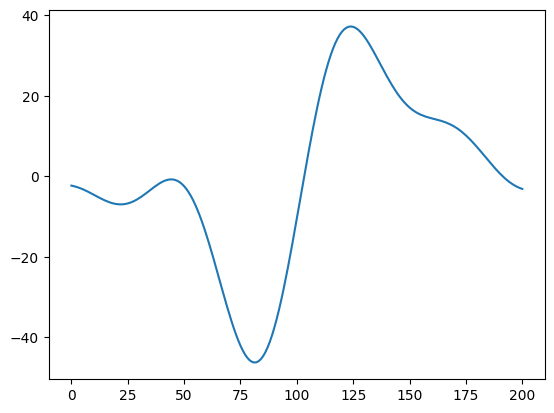

In [5]:
plt.plot(signal)
plt.show()

In [85]:
def nextpowof2(x):
    n=1
    while n<x:n*=2
    return n

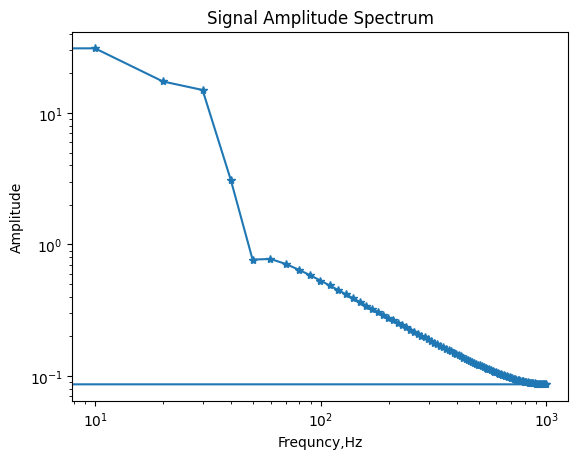

In [66]:
plt.loglog(frequency, amplitude,'*-')
plt.xlabel('Frequncy,Hz')
plt.ylabel('Amplitude')
plt.title('Signal Amplitude Spectrum')
plt.show()

In [91]:
def compute_fft(sig: str, D):
    """Compute the FFT of a signal
    sig: input signal in numpy array format
    D: duration of the signal
    
    returns the frequency, amplitude and power of the signal in numpy array format
    """
    signal = np.array(data[sig])
    sample_rate = 2000 # in Hz
    num_samples = len(signal)
    time_step = 0.0005 # in seconds
    sample_freq = 1 / time_step
    pow2 = (nextpowof2(num_samples))
    fft_output = rfft(signal) / num_samples
    freqs = rfftfreq(num_samples, time_step)
    amplitude = np.abs(fft_output)
    power = amplitude ** 2
    return signal, freqs, amplitude, power

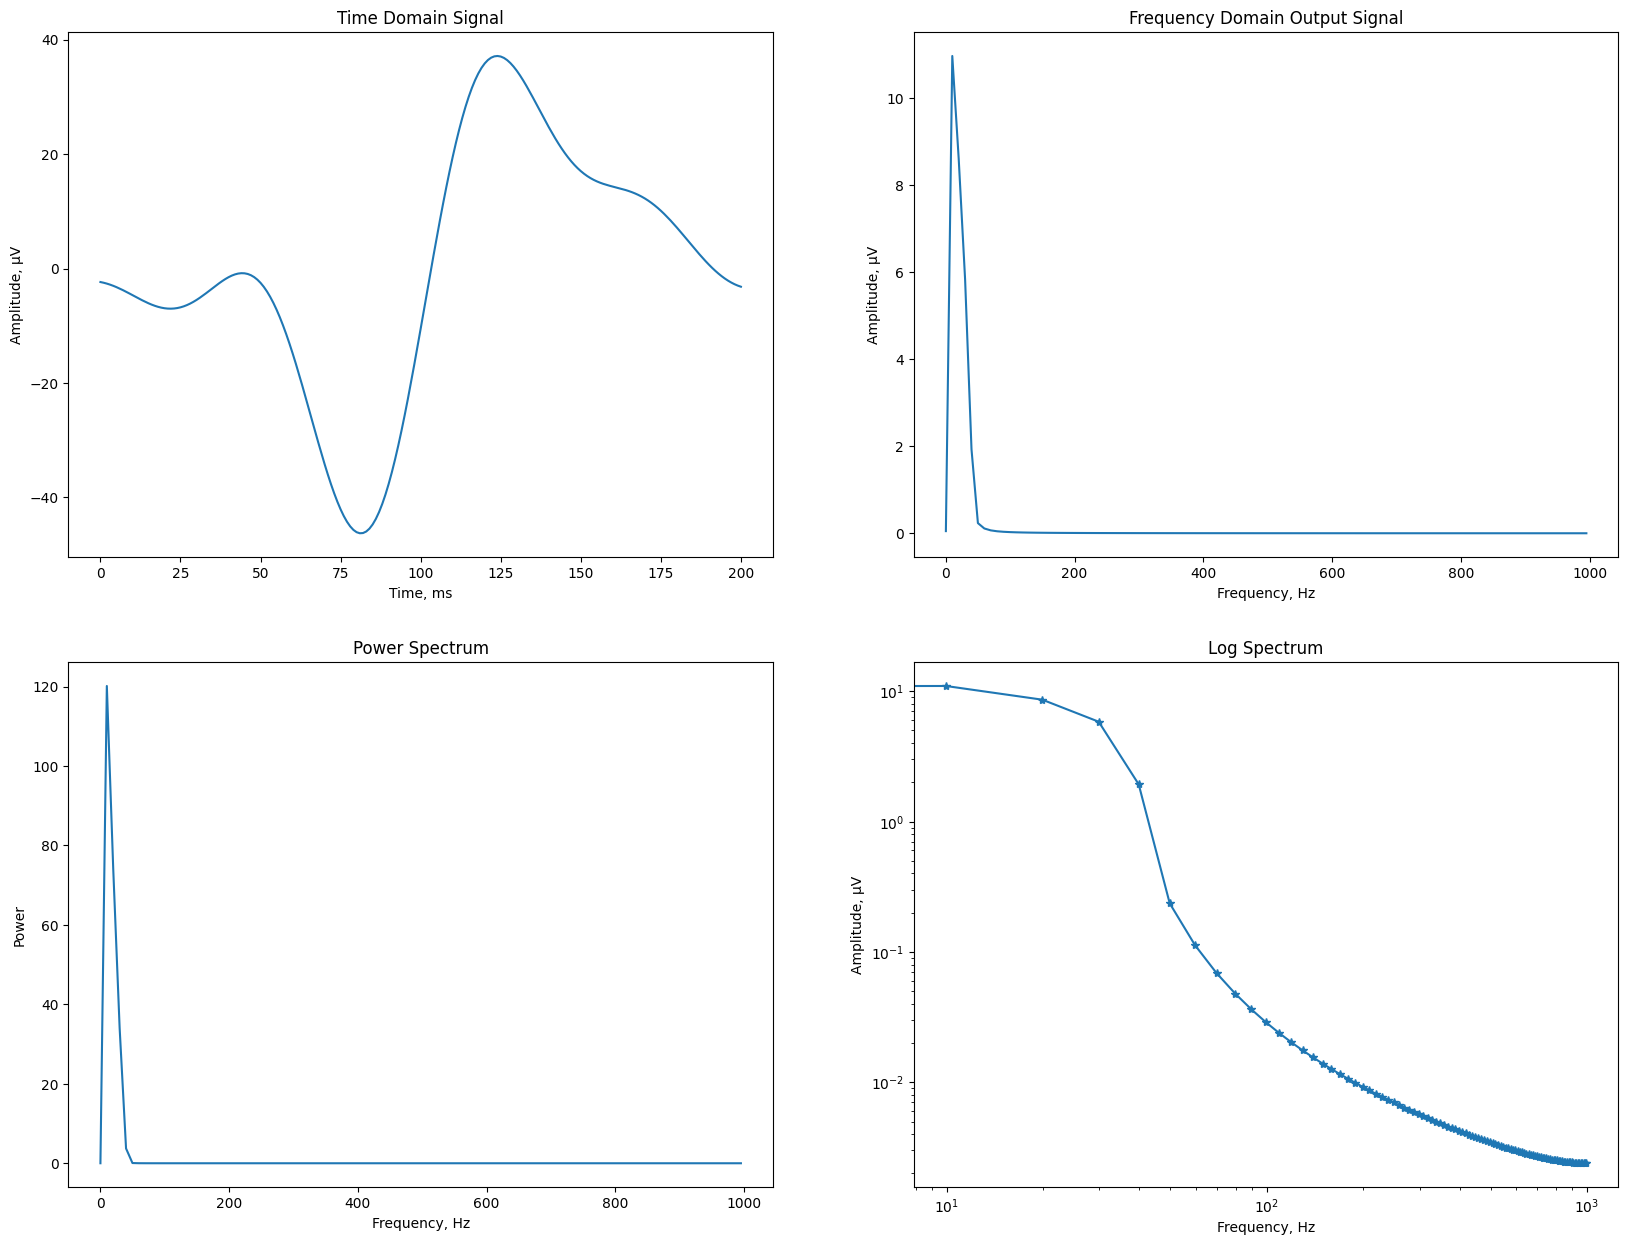

In [116]:
sig3, freq3, amp3, power3 = compute_fft('3', duration) # healthy
plot_ft_signal(sig3, freq3, amp3, power3)

In [113]:
def plot_ft_signal(sig, freq, amp, amp_pow):
    fig = plt.figure(figsize = (20, 15))
    ax = fig.add_subplot(221)
    plt.gca().set_title('Time Domain Signal')
    plt.plot(sig)
    plt.xlabel('Time, ms')
    plt.ylabel('Amplitude, µV')
    ax = fig.add_subplot(222)
    plt.gca().set_title('Frequency Domain Output Signal')
    plt.plot(freq, amp)
    plt.xlabel('Frequency, Hz')
    plt.ylabel('Amplitude, µV')
    ax = fig.add_subplot(223)
    plt.gca().set_title('Power Spectrum')
    plt.plot(freq, amp_pow)
    plt.xlabel('Frequency, Hz')
    plt.ylabel('Power')
    ax = fig.add_subplot(224)
    plt.gca().set_title('Log Spectrum')
    plt.loglog(frequency, amplitude,'*-')
    plt.xlabel('Frequency, Hz')
    plt.ylabel('Amplitude, µV')
    plt.show()

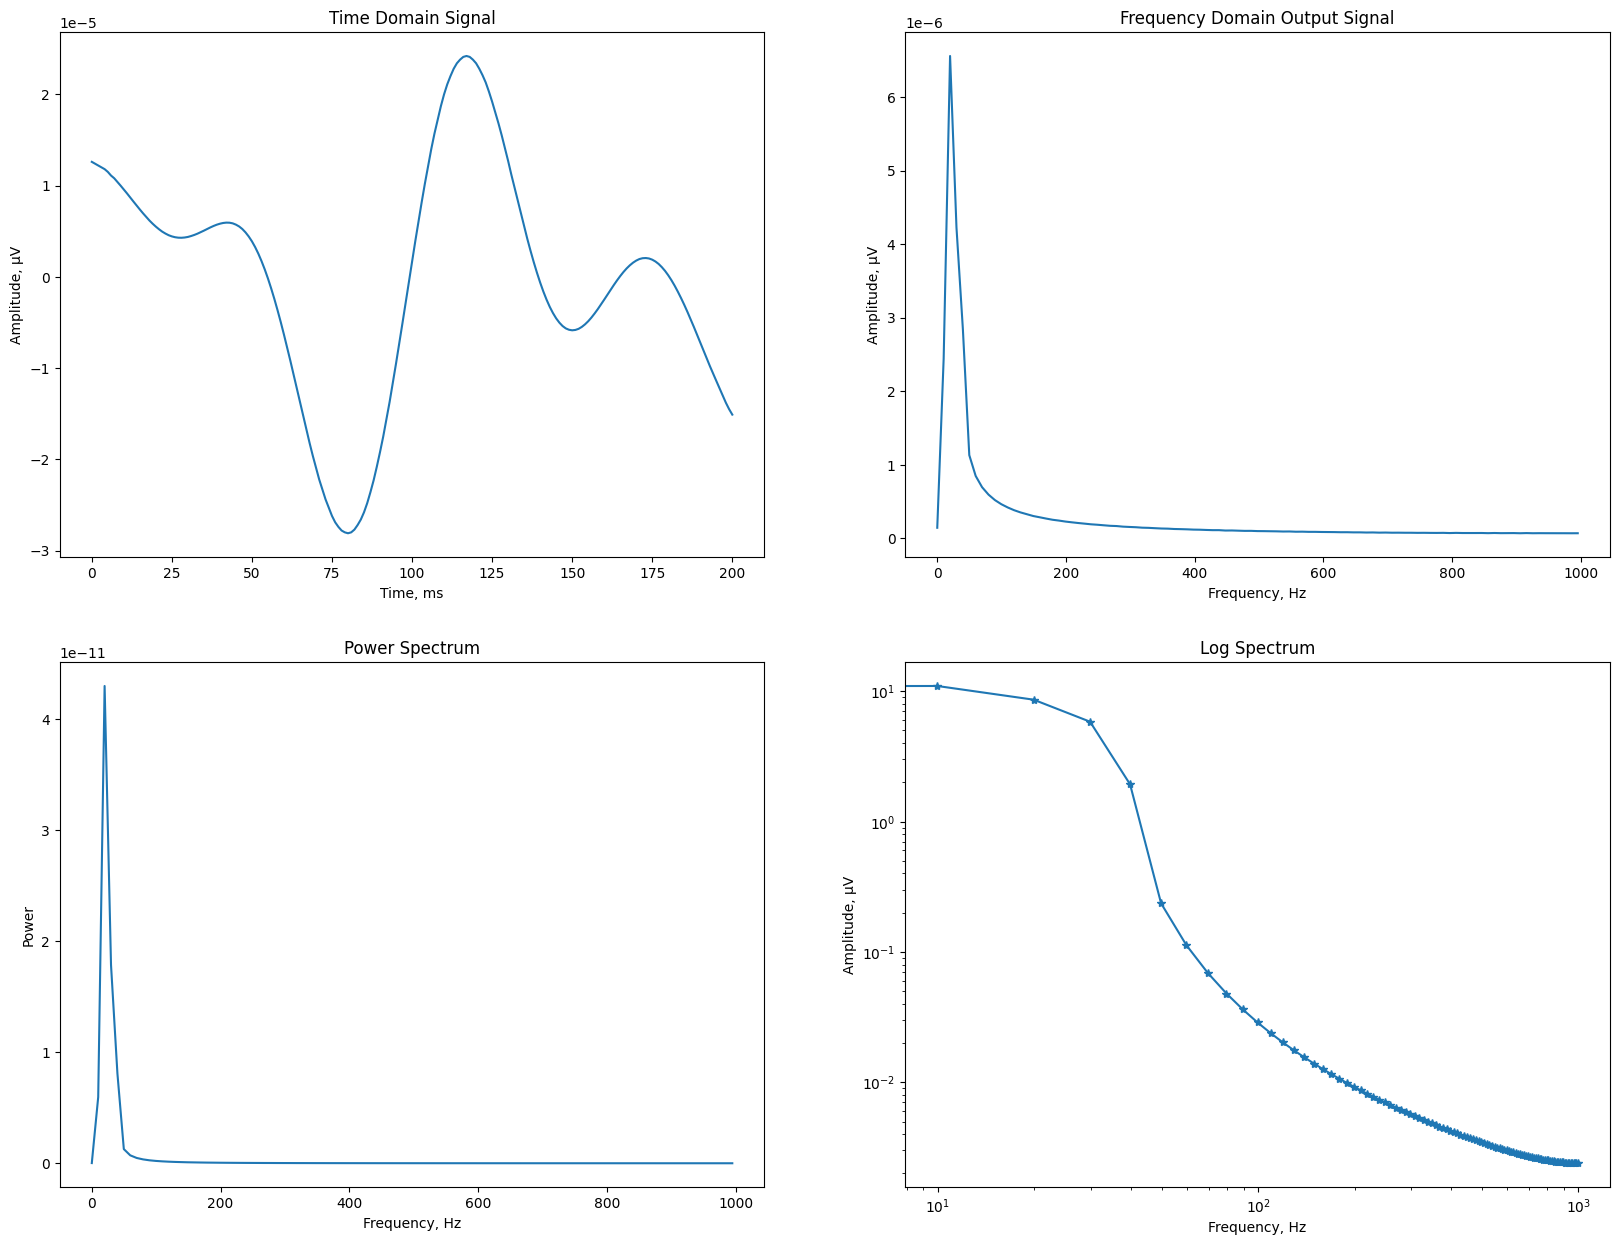

In [117]:
sig5, freq5, amp5, power5 = compute_fft('5', duration) # Unhealthy
plot_ft_signal(sig5, freq5, amp5, power5)

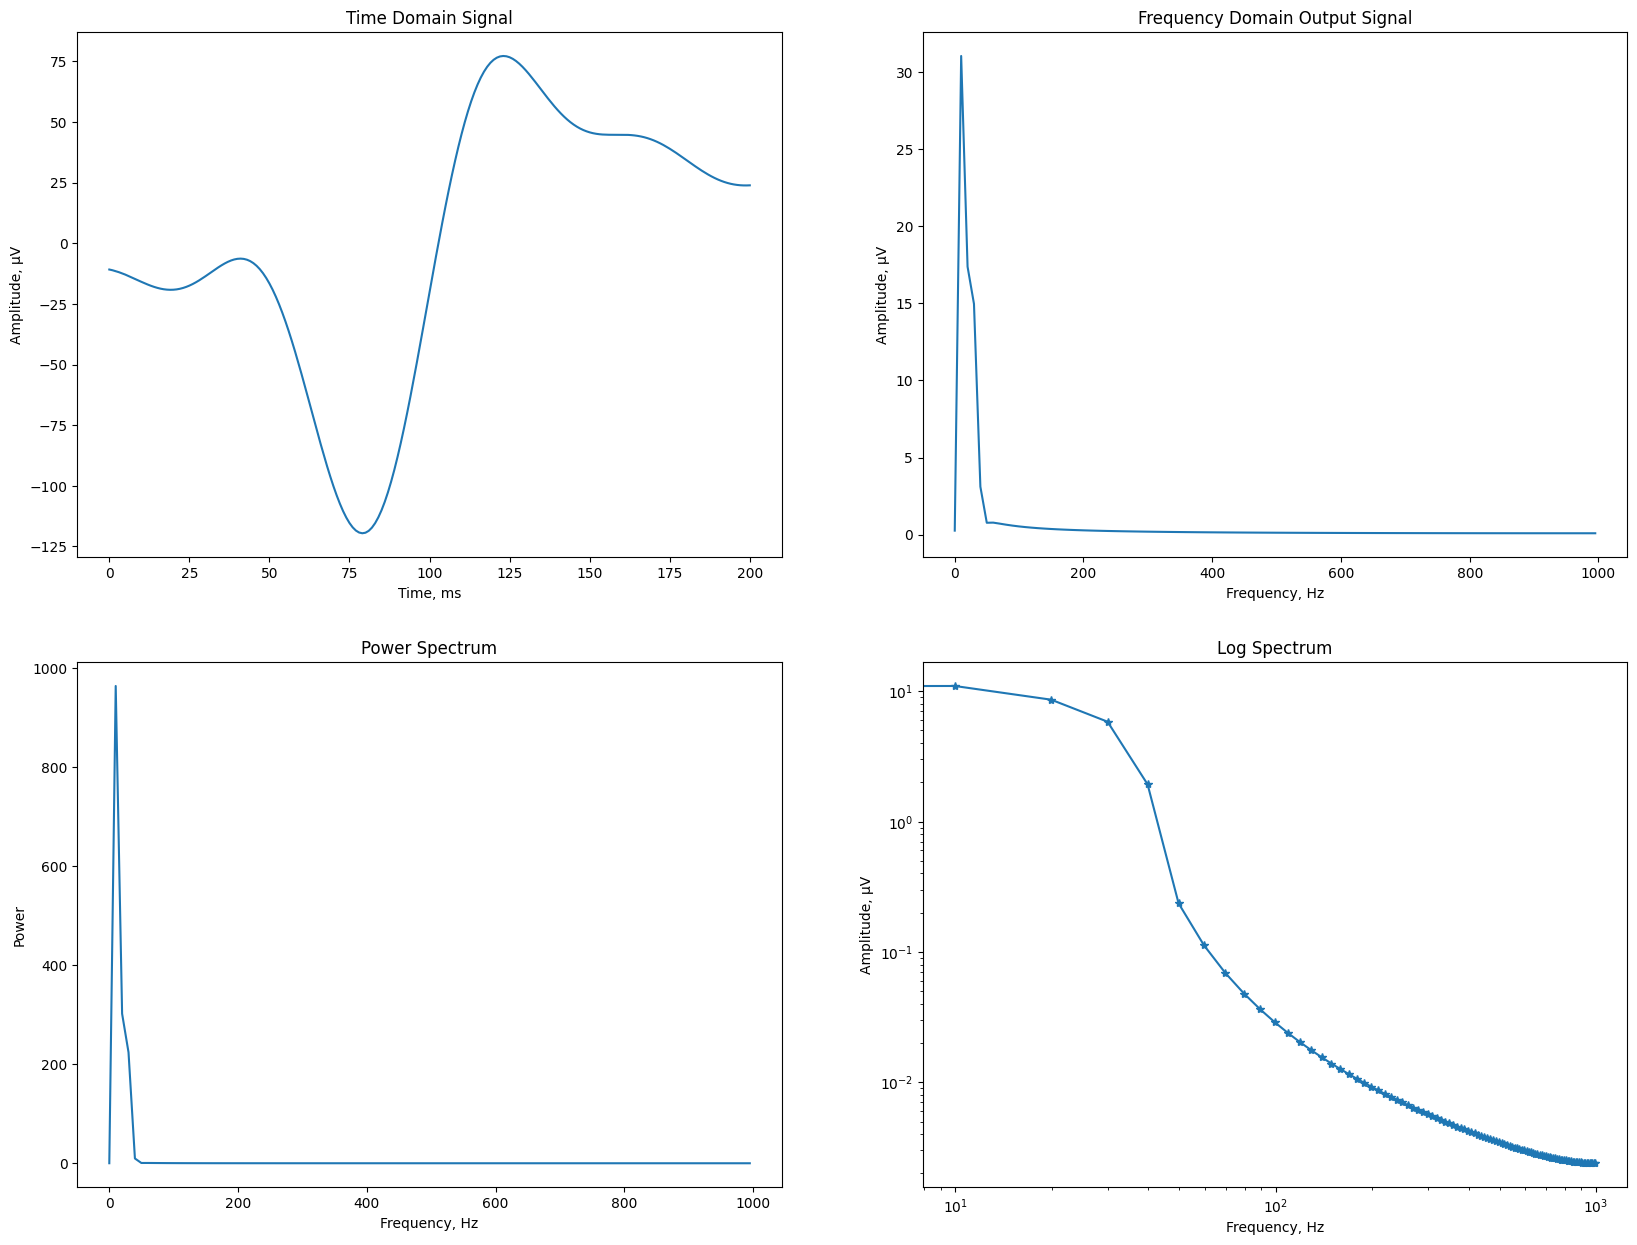

In [118]:
sig6, freq6, amp6, power6 = compute_fft('6', duration) # Unhealthy
plot_ft_signal(sig6, freq6, amp6, power6)

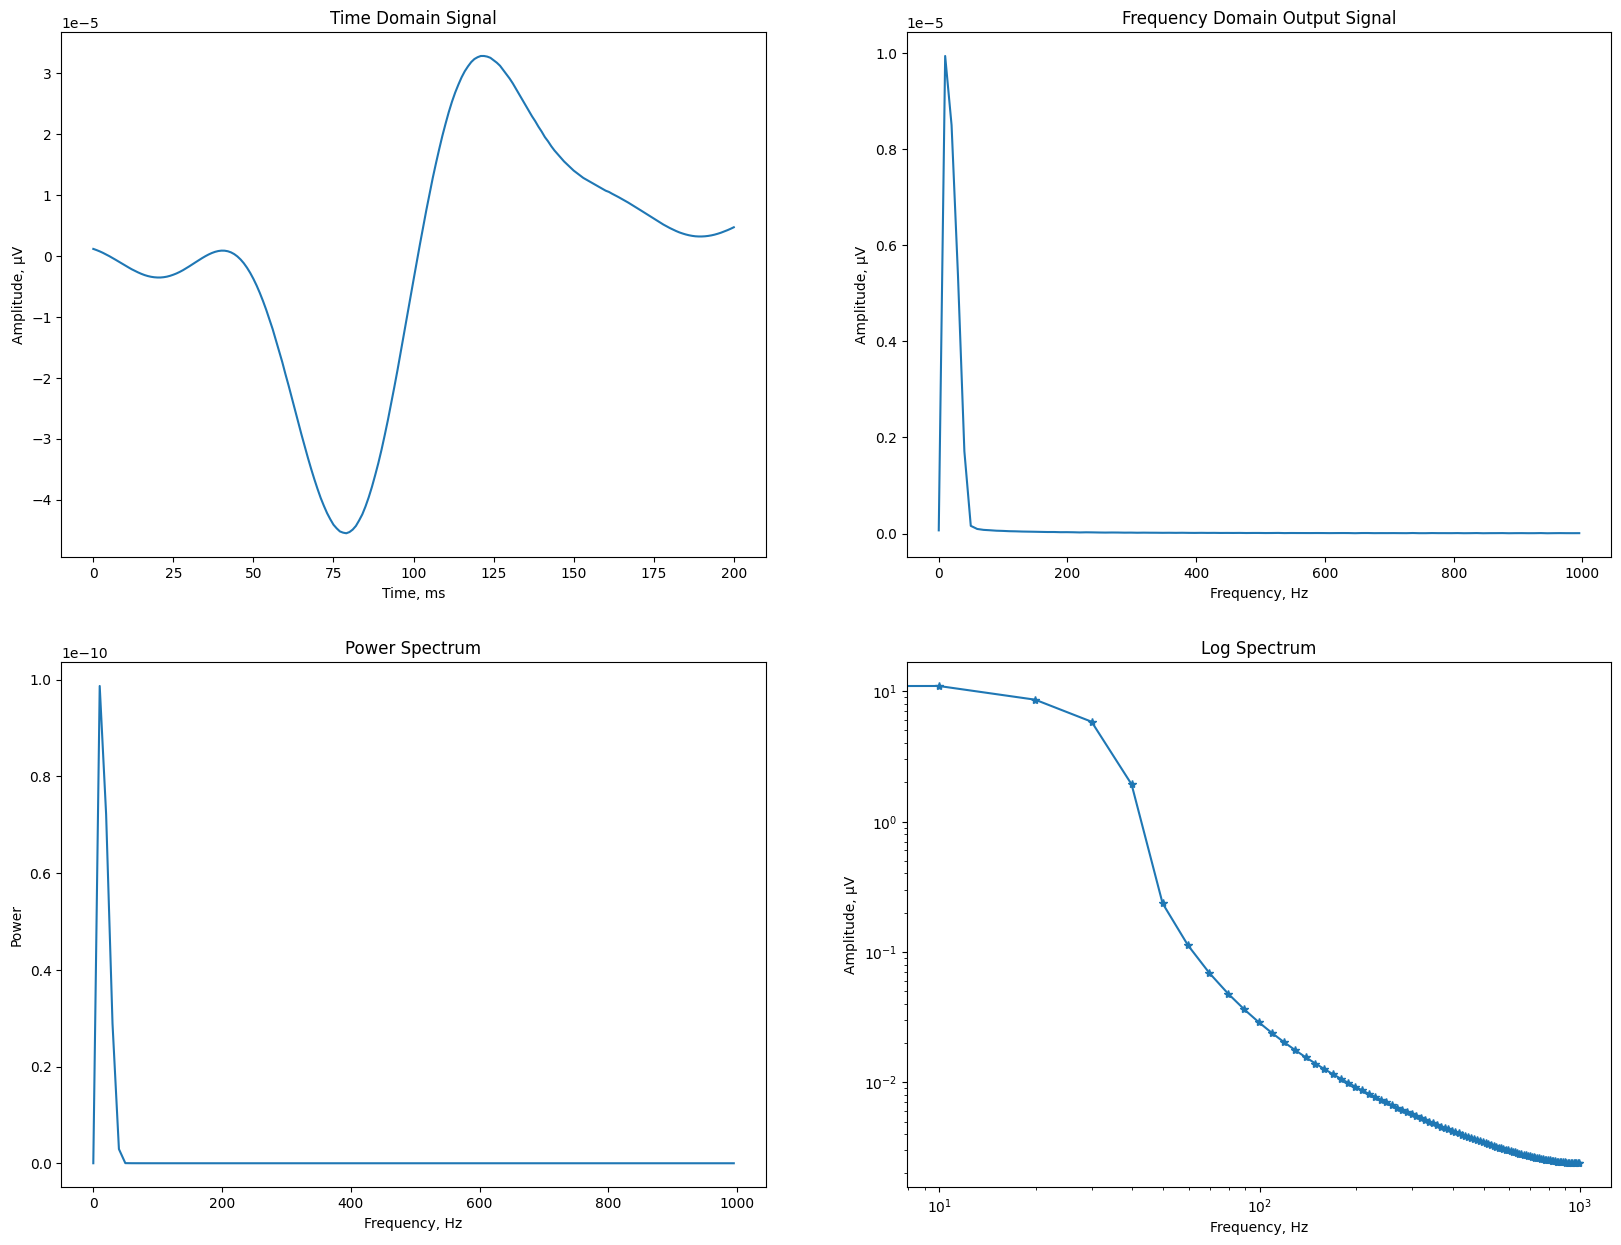

In [120]:
sig6_1, freq6_1, amp6_1, power6_1 = compute_fft('6.1', duration) # Unhealthy
plot_ft_signal(sig6_1, freq6_1, amp6_1, power6_1)

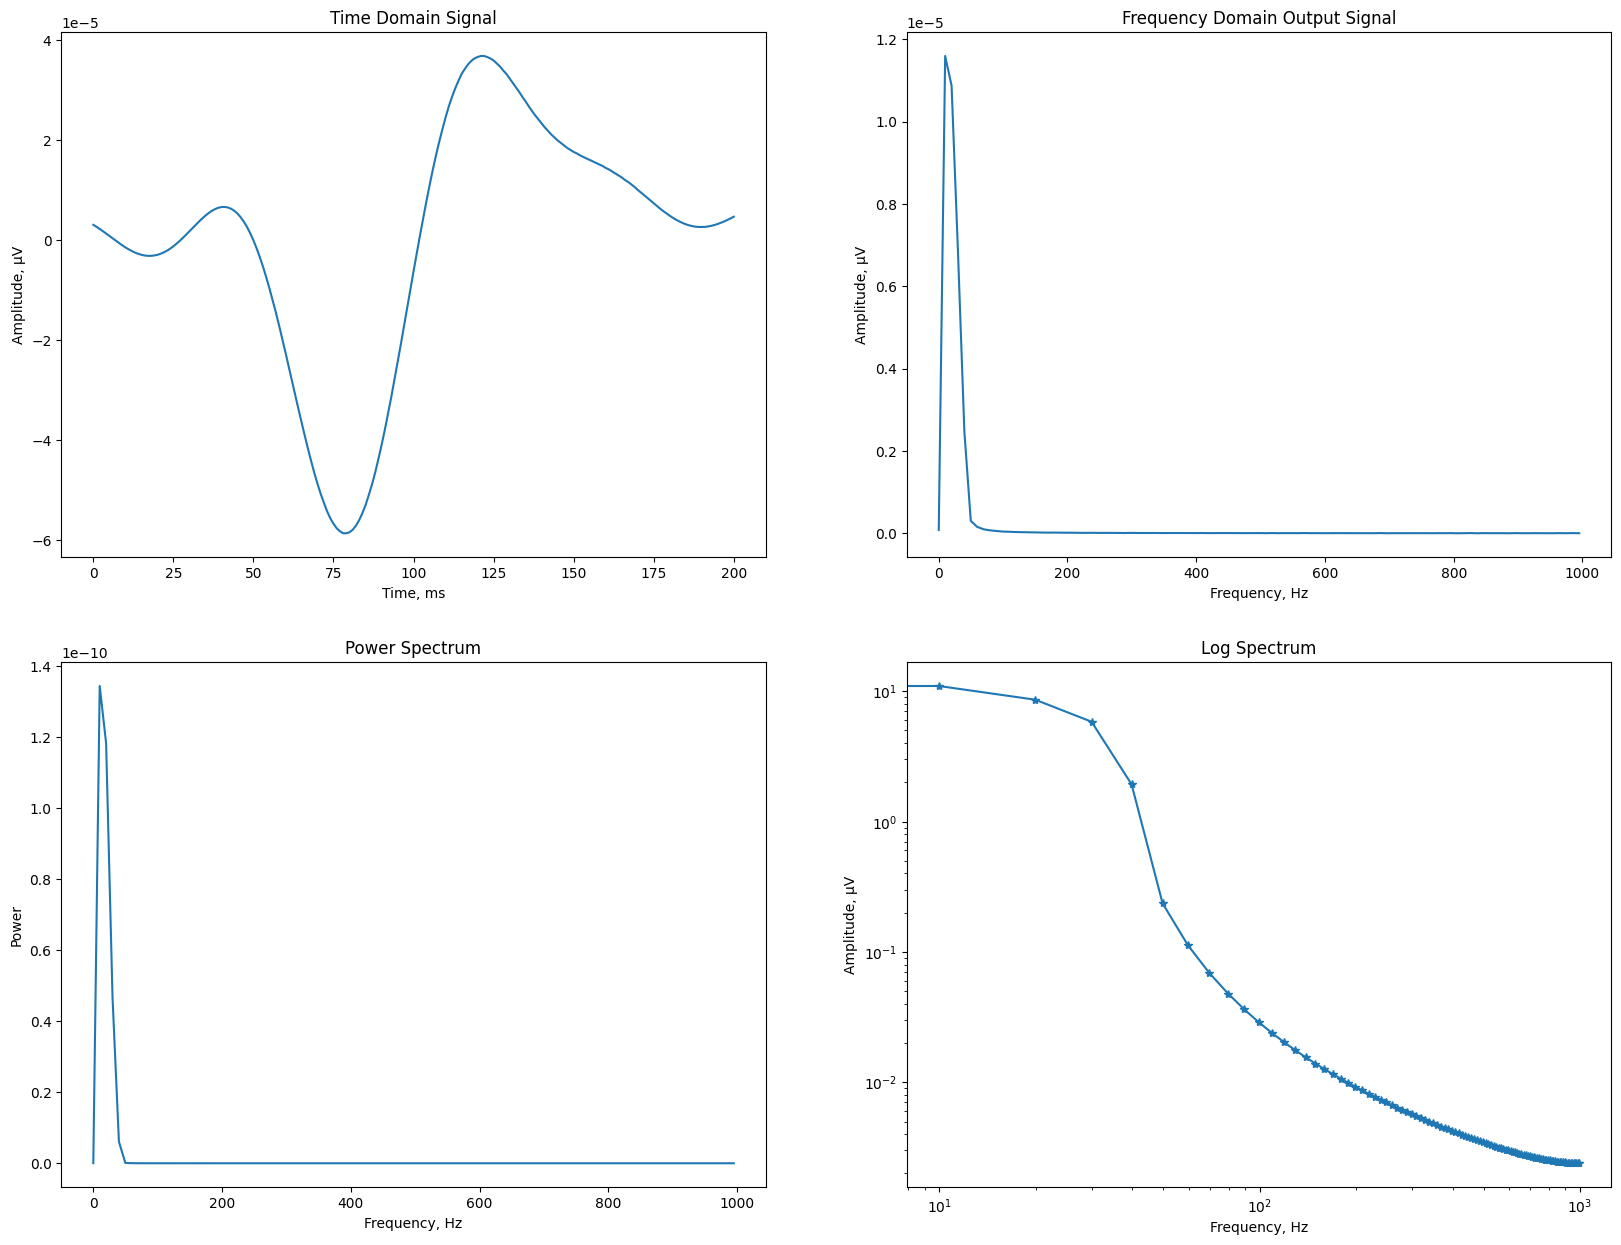

In [121]:
sig6_2, freq6_2, amp6_2, power6_2 = compute_fft('6.2', duration) # Unhealthy
plot_ft_signal(sig6_2, freq6_2, amp6_2, power6_2)

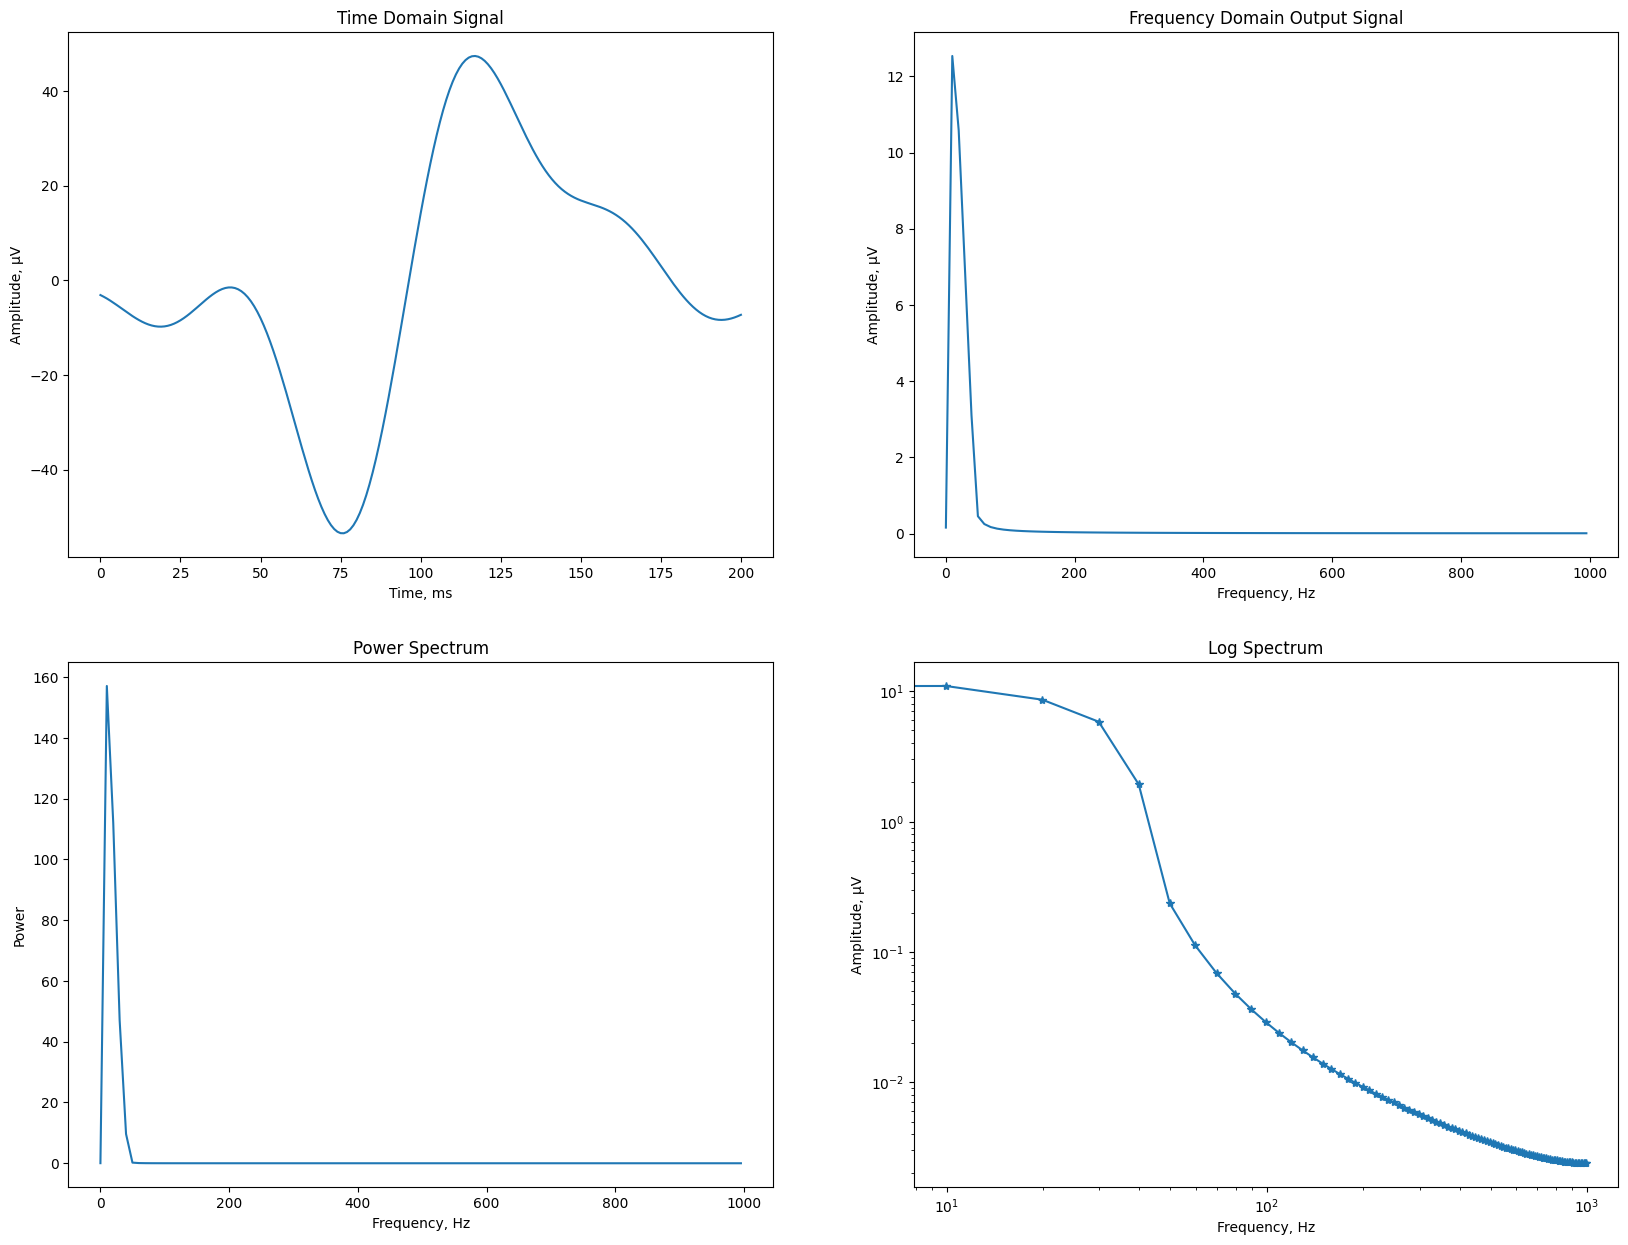

In [122]:
sig15, freq15, amp15, power15 = compute_fft('15', duration) # healthy
plot_ft_signal(sig15, freq15, amp15, power15)

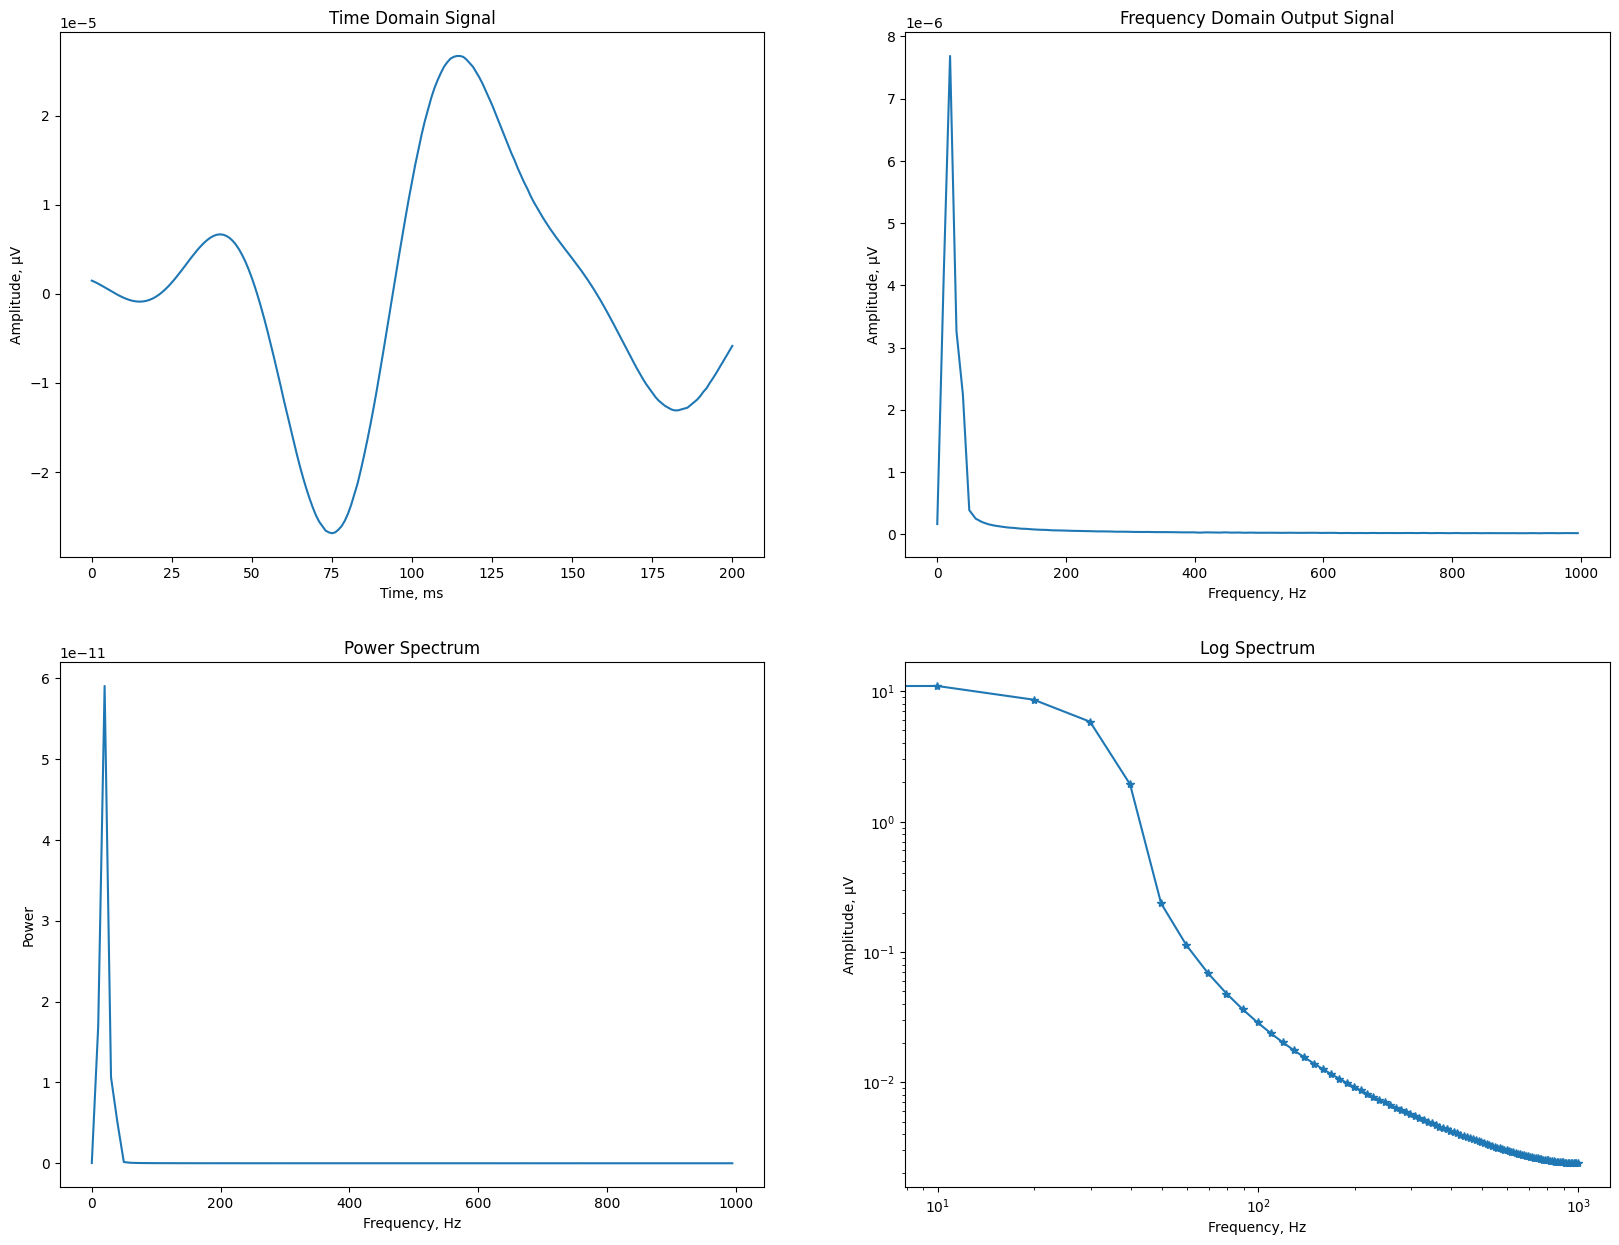

In [123]:
sig17, freq17, amp17, power17 = compute_fft('17', duration)
plot_ft_signal(sig17, freq17, amp17, power17)

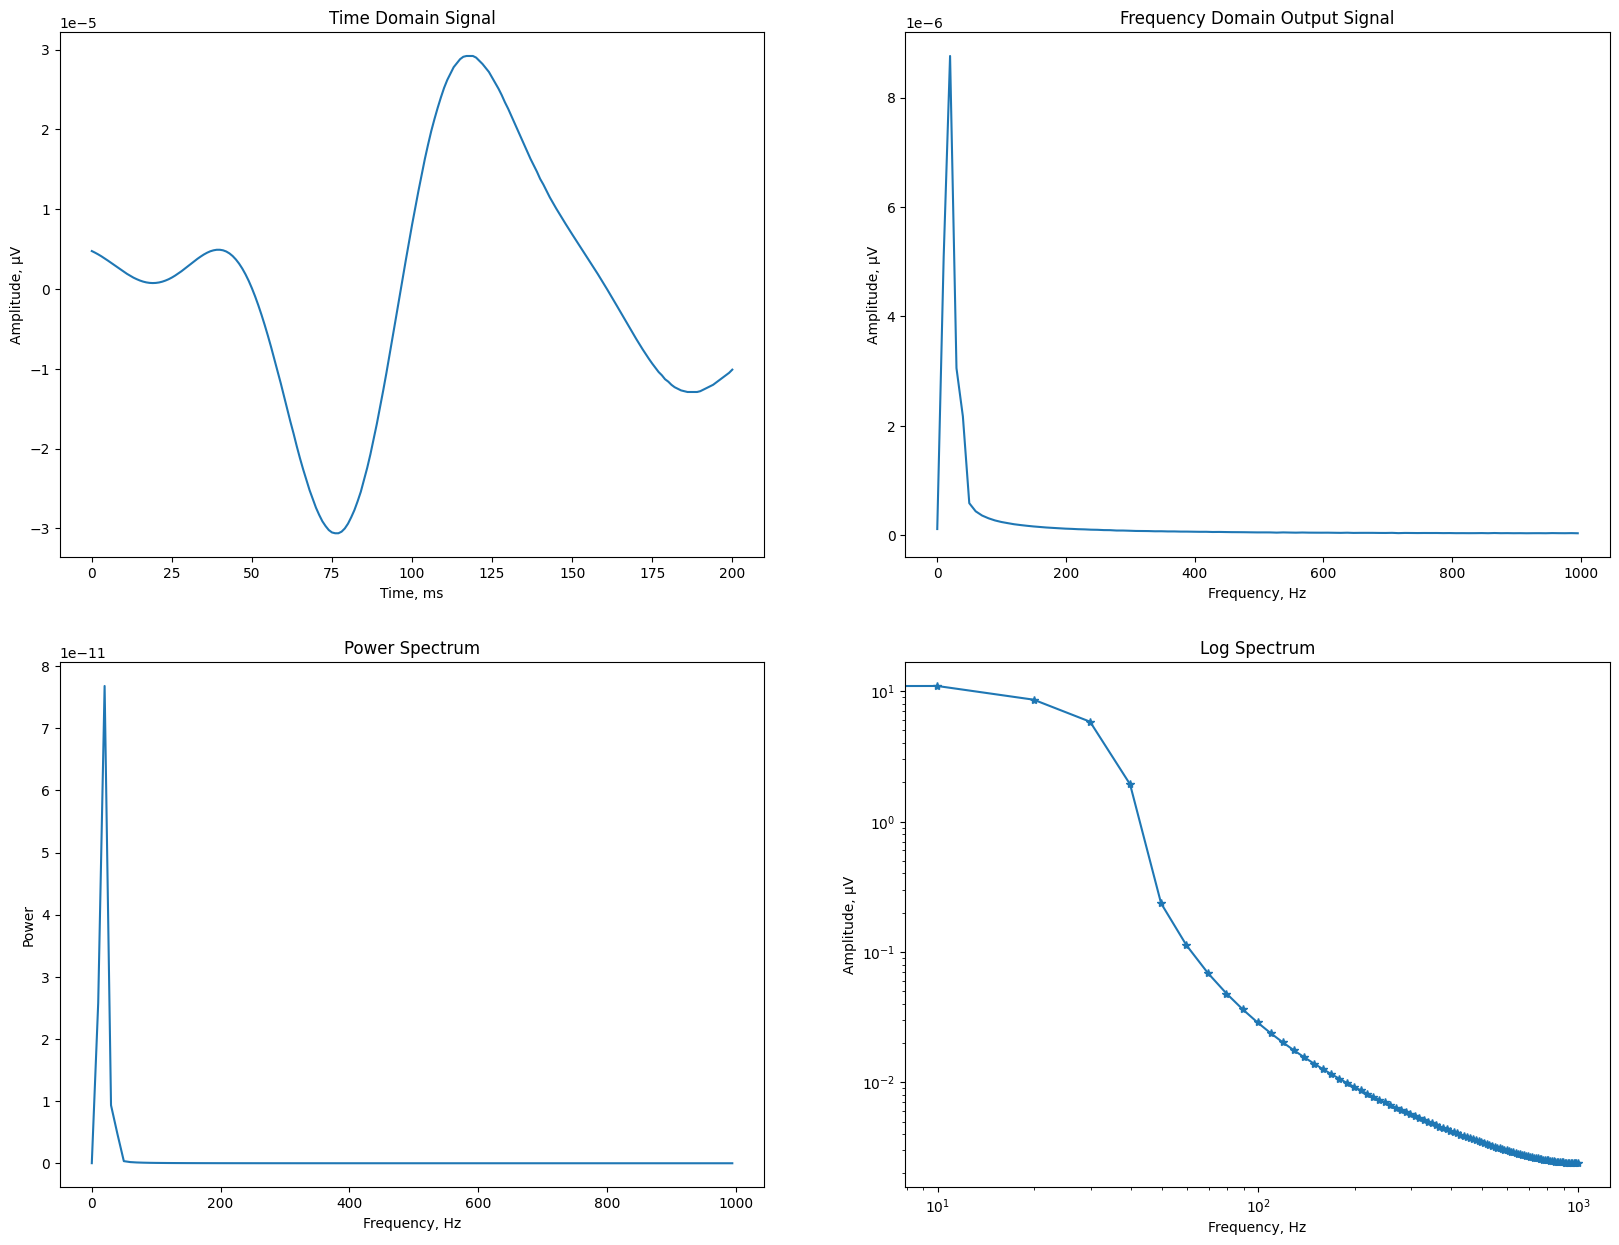

In [124]:
sig17_1, freq17_1, amp17_1, power17_1 = compute_fft('17.1', duration) # healthy
plot_ft_signal(sig17_1, freq17_1, amp17_1, power17_1)

In [73]:
def plot_spectrogram(sig: str):
    time_step = 0.0005 # in seconds
    sample_freq = 1 / time_step
    signal = np.array(data[sig])
    plt.specgram(signal, Fs = sample_freq, NFFT = 32, noverlap = 4, cmap = 'jet')
    plt.colorbar()
    plt.xlabel('Time')
    plt.ylabel('Frequency')

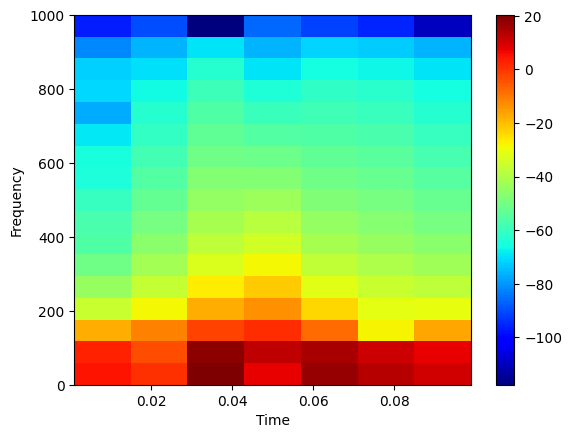

In [75]:
plot_spectrogram('3') # healthy

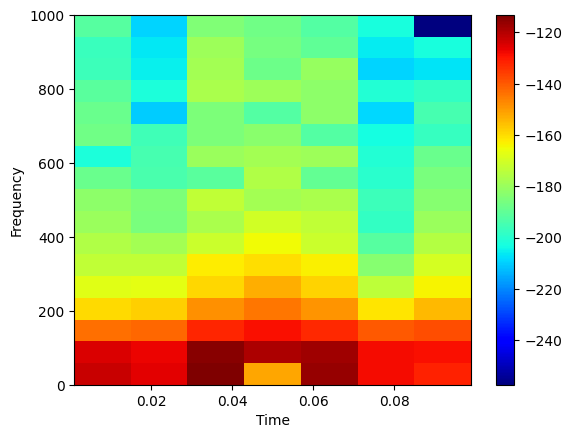

In [125]:
plot_spectrogram('5') # Unhealthy

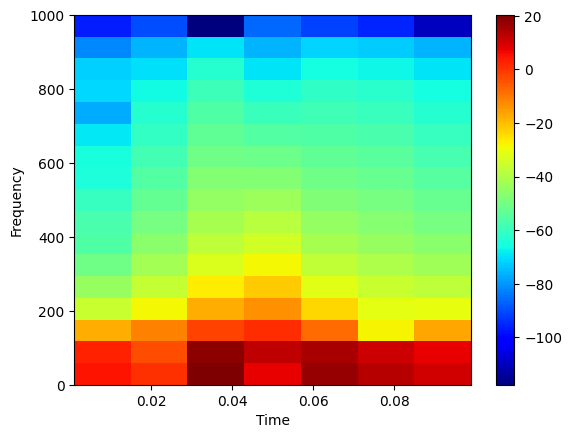

In [126]:
plot_spectrogram('6') # Unhealthy

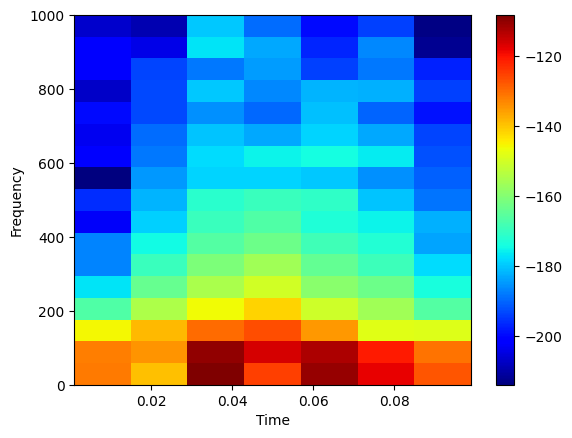

In [127]:
plot_spectrogram('6.1') # Unhealthy

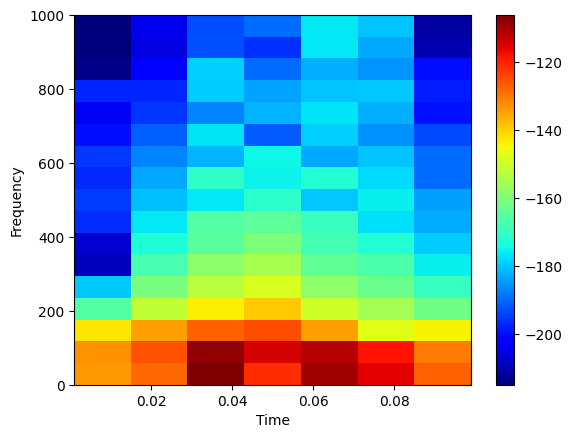

In [128]:
plot_spectrogram('6.2') # Unhealthy

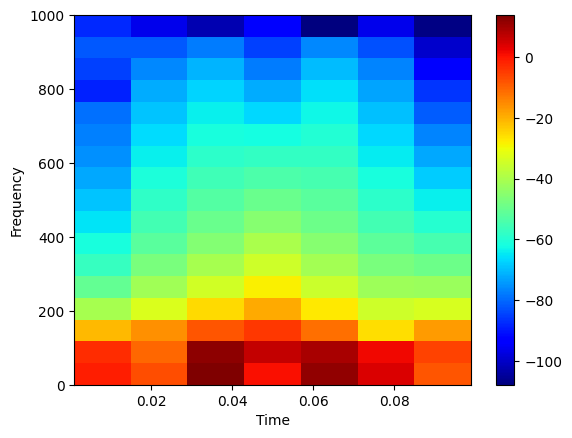

In [129]:
plot_spectrogram('15') # healthy

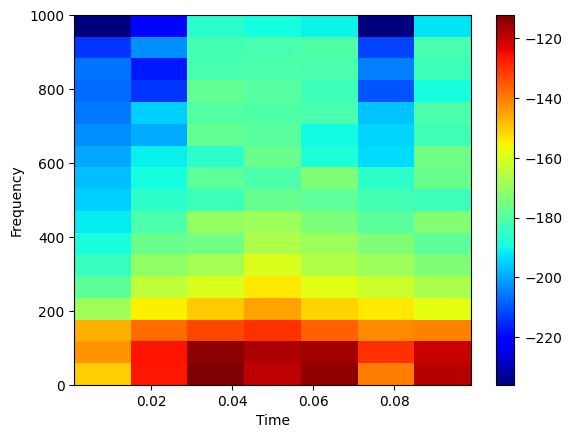

In [130]:
plot_spectrogram('17') # healthy

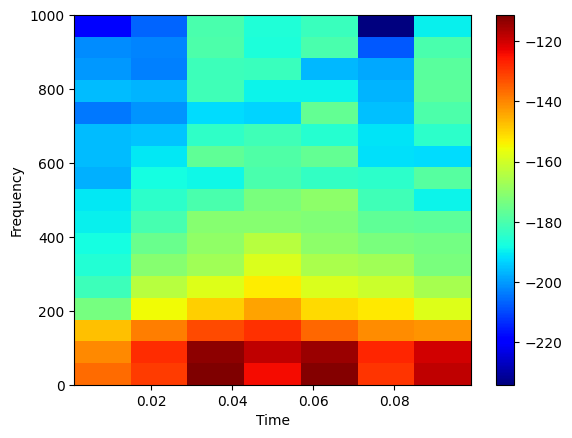

In [131]:
plot_spectrogram('17.1') # healthy